In [95]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch

**Checking the Availability of GPU in the colab Notebook using cuda library and instructing it to use GPU for processing**

In [96]:

if torch.cuda.is_available():       
    device = torch.device("cuda")
    print( torch.cuda.device_count())
    print('Available:', torch.cuda.get_device_name(0))
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

No GPU available, using the CPU instead.


**Installing the required libraries required**

In [97]:
!pip install wget
!pip install transformers

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


**Downloading the datasets**

In [98]:
url_train='https://groups.csail.mit.edu/sls/downloads/movie/engtrain.bio'
url_test='https://groups.csail.mit.edu/sls/downloads/movie/engtest.bio'


In [99]:
import wget
import os

In [100]:
wget.download(url_train)

100% [..........................................................................] 1013492 / 1013492

'engtrain (1).bio'

In [7]:
wget.download(url_test)

100% [............................................................................] 252636 / 252636

'engtest.bio'

**Appending all the row lines from bio format file using csvreader() function**

In [101]:
import csv
sentences = []
labels = []

tokens = []
token_labels = []
unique_labels = set()

with open("./engtrain.bio", newline = '') as lines:                                                                                          
  
    line_reader = csv.reader(lines, delimiter='\t')
    
    for line in line_reader:
#         print(line)
        if line == []:

            sentences.append(tokens)
            labels.append(token_labels)           
    
            tokens = []
            token_labels = []        

        else: 

            tokens.append(line[1])
            token_labels.append(line[0])

            unique_labels.add(line[0])

            

**Sentences Output**

In [102]:
[  print(' '.join(sentences[i])) for i in range(len(sentences))]

what movies star bruce willis
show me films with drew barrymore from the 1980s
what movies starred both al pacino and robert deniro
find me all of the movies that starred harold ramis and bill murray
find me a movie with a quote about baseball in it
what movies have mississippi in the title
show me science fiction films directed by steven spielberg
do you have any thrillers directed by sofia coppola
what leonard cohen songs have been used in a movie
show me films elvis films set in hawaii
what movie is references zydrate
are there any musical films with patrick dempsey
list westerns starring john wayne
show me military related movies with demi moore
did stephen made any sex or horror movie that must be have to watch
did ang lee direct a costume drama movie set in the 1800s
who directed the first james bond movies
list the r rated best picture oscar winners
where can i buy the sucker punch soundtrack
what british movies came out in 1990s about the royal family
who did the soundtrack to 

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

**Sample Input Sentence**

In [103]:
' '.join(sentences[1])

'show me films with drew barrymore from the 1980s'

In [104]:
pd.DataFrame({"Word":sentences[1],"Labels":labels[1]})

,Word,Labels
0,show,O
1,me,O
2,films,O
3,with,O
4,drew,B-ACTOR
5,barrymore,I-ACTOR
6,from,O
7,the,O
8,1980s,B-YEAR


In [105]:
print("Number of training sentences: {:,}".format(len(sentences)))

Number of training sentences: 9,775


**Preparing input text data for Feeding it into BERT model by converting and spilting the text into tokens and mapping the tokens using BertTokenizer functon**

In [152]:
from transformers import BertTokenizer
import numpy as np
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [153]:
tokenizer.encode(sentences[1])

[2265, 2033, 3152, 2007, 3881, 100, 2013, 1996, 3865]

In [154]:
# tokenizer.decode([101, 2265, 2033, 3152, 2007, 3881, 100, 2013, 1996, 3865, 102])
tokenizer.decode([2265, 2033, 3152, 2007, 3881, 100, 2013, 1996, 3865])

'show me films with drew [UNK] from the 1980s'

**Calculating of length of each tokenized sentences**

In [109]:
TokenLength=[len(tokenizer.encode(' '.join(i),add_special_tokens=True)) for i in sentences]

In [110]:
print('Minimum  length: {:,} tokens'.format(min(TokenLength)))
print('Maximum length: {:,} tokens'.format(max(TokenLength)))
print('Median length: {:,} tokens'.format(int(np.median(TokenLength))))

Minimum  length: 3 tokens
Maximum length: 51 tokens
Median length: 12 tokens


C:\Users\Muhammad Ali Murtaza\AppData\Local\Temp\ipykernel_15232\768734983.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(TokenLength, kde=False, rug=False,color='plum')


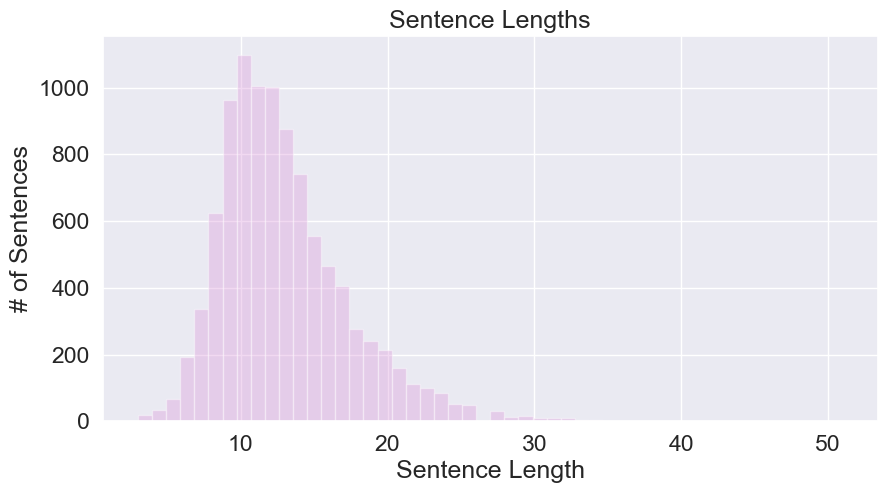

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.figure(figsize=(10,5))
plt.rcParams["figure.figsize"] = (10,5)

# Plot the distribution of comment lengths.
sns.distplot(TokenLength, kde=False, rug=False,color='plum')

plt.title('Sentence Lengths')
plt.xlabel('Sentence Length')
plt.ylabel('# of Sentences');

**Now we must include Padding [PAD] token in the input so every tokens should be of same length. We have selected max length of PAD token to be 55 (as max is 51)**

In [178]:
# #Sample Sentence
# SampleSentence = tokenizer.encode_plus(' '.join(sentences[1]), 
#                                      add_special_tokens = True,
#                                      max_length=51,
# #                                          max_length=32,
# #                                     padding='max_length',
# #                                     truncation=True,
# #                                      return_attention_mask=1,
#                                      return_tensors='tf',
# #                                      pad_to_max_length='max_length',
                                     
# #                                      truncation=True,
                                     
#                                      )
# SampleSentence
tokens , token_ids , attention_masks = [], [], []
for sen in sentences:
    
    # Tokenize the text
    token = (tokenizer.tokenize(' '.join(sentences[i])))
    tokens.append(token)

    # Encode the tokens to get token IDs
    token_id = (tokenizer.convert_tokens_to_ids(token))
    token_ids.append(token_id)

    # Create the attention mask manually
    attention_mask = [1] * len(token_id)  # Set 1 for tokens

    max_length = 51
    if len(attention_mask) < max_length:
        attention_mask += [0] * (max_length - len(attention_mask))  # Set 0 for padding
#     print('Attention Mask: ', attention_mask)
    attention_masks.append((attention_mask))
#     print('Length of attention mask: ', len(attention_mask))
#     break
# Convert the attention mask to a PyTorch tensor

attention_masks = torch.tensor((attention_masks))

print(tokens[0])
print(token_ids[0])
print(attention_masks[0])

['i', 'want', 'to', 'find', 'the', 'movie', 'with', 'scarlett', 'o', 'hara', 'in', 'it']
[1045, 2215, 2000, 2424, 1996, 3185, 2007, 20862, 1051, 18820, 1999, 2009]
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0])


In [139]:
##input_ids
print("\nInput Ids:",SampleSentence["input_ids"])
##attention_mask
# print("\nAttention Mask:",SampleSentence["attention_mask"])


Input Ids: tf.Tensor([[ 101 2265 2033 3152 2007 3881 6287 5974 2013 1996 3865  102]], shape=(1, 12), dtype=int32)


**Mapping Label**

In [140]:
label_map = {}

for (i, label) in enumerate(unique_labels):
    
    # Map it to its integer
    label_map[label] = i

**Adding Attention Mask**

In [162]:

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

input_ids = []

# attention_masks = []

for sent in sentences:

    sent_str = ' '.join(sent)
    encoded_dict = tokenizer.encode_plus(
                        sent_str,                 
                        add_special_tokens = True,
#                         truncation = True,
                        max_length = 55,           
#                         pad_to_max_length = True,
#                         return_attention_mask = True,   
                        return_tensors = 'pt',     
                   )
    
        
    input_ids.append(encoded_dict['input_ids'][0])
    
    # And its attention mask
#     attention_masks.append(encoded_dict['attention_mask'][0])

print('Original: ', sentences[24])
print('Token IDs:', input_ids[24])
print('Masks:', attention_mask)

Original:  ['find', 'the', 'movies', 'action', 'movies', 'directed', 'by', 'john', 'woo', 'from', 'the', '1990s']
Token IDs: tensor([  101,  2424,  1996,  5691,  2895,  5691,  2856,  2011,  2198, 15854,
         2013,  1996,  4134,   102])
Masks: tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])


In [179]:
new_labels = []

# The special label ID we'll give to "extra" tokens.
null_label_id = -100

for (sen, orig_labels) in zip(input_ids, labels):
    
    padded_labels = []

    orig_labels_i = 0 

    for token_id in sen:

        token_id = token_id.numpy().item()

        if (token_id == tokenizer.pad_token_id) or \
            (token_id == tokenizer.cls_token_id) or \
            (token_id == tokenizer.sep_token_id):
            
            padded_labels.append(null_label_id)

        elif tokenizer.ids_to_tokens[token_id][0:2] == '##':

            padded_labels.append(null_label_id)

        else:
            
            label_str = orig_labels[orig_labels_i]

            padded_labels.append(label_map[label_str])

            orig_labels_i += 1

    assert(len(sen) == len(padded_labels))    

    new_labels.append(padded_labels)


In [180]:
print('\nSentence:    ', sentences[2])
print('\nLabels:      ', labels[2])
print('\nBERT Tokens: ', tokenizer.tokenize(' '.join(sentences[2])))
print('\nToken IDs:   ', input_ids[2])
print('\nNew Labels:  ', new_labels[2])
# print('\nMask:        ', attention_masks[2])


Sentence:     ['what', 'movies', 'starred', 'both', 'al', 'pacino', 'and', 'robert', 'deniro']

Labels:       ['O', 'O', 'O', 'O', 'B-ACTOR', 'I-ACTOR', 'O', 'B-ACTOR', 'I-ACTOR']

BERT Tokens:  ['what', 'movies', 'starred', 'both', 'al', 'pac', '##ino', 'and', 'robert', 'den', '##iro']

Token IDs:    tensor([  101,  2054,  5691,  5652,  2119,  2632, 14397,  5740,  1998,  2728,
         7939,  9711,   102])

New Labels:   [-100, 18, 18, 18, 18, 13, 20, -100, 18, 13, 20, -100, -100]


**Convert the lists into PyTorch tensors using torch.stack**

In [182]:

# Concatenates a sequence of tensors along a new dimension
# [7,660  x  50].

max_tokens = max(TokenLength)

# for i in range(len(new_labels)):
#     print(new_labels[i])

# Padding to ensure all sequences have the same length
for i in range(len(input_ids)):
#     print(len(new_labels[i]), len(input_ids[i]))
#     if len(input_ids[i]) < 51:
    input_ids[i] = torch.cat((input_ids[i] , torch.zeros(max_tokens - len(input_ids[i]))), dim=0)
    new_labels[i] = torch.cat((torch.FloatTensor(new_labels[i]) , torch.zeros(max_tokens - len(new_labels[i]))), dim=0)


pt_input_ids = torch.stack(input_ids, dim=0)
pt_labels = new_labels

pt_attention_masks = torch.stack(attention_masks, dim=0)

pt_labels = torch.tensor(new_labels, dtype=torch.long)

TypeError: stack(): argument 'tensors' (position 1) must be tuple of Tensors, not Tensor

In [150]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(pt_input_ids, pt_attention_masks, pt_labels)

# Create a 90-10 train-validation split.
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

NameError: name 'pt_attention_masks' is not defined

**Convert tensors into Batches for batch wise training and using RandomSampler for selecting the batch Randomly**

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler


batch_size = 32

train_dataloader = DataLoader(train_dataset, sampler = RandomSampler(train_dataset), batch_size = batch_size )

validation_dataloader = DataLoader(val_dataset, sampler = SequentialSampler(val_dataset), batch_size = batch_size   )

**Using 12 Layer BERT Model for out task**

In [ ]:
from transformers import BertForTokenClassification, AdamW, BertConfig


model = BertForTokenClassification.from_pretrained("bert-base-uncased", num_labels = len(label_map) + 1, output_attentions = False, output_hidden_states = False)


model.cuda()

In [ ]:
# Load the AdamW optimizer
optimizer = AdamW(model.parameters(),
                  lr = 5e-5, # args.learning_rate 
                  eps = 1e-8 # args.adam_epsilon 
                )


In [ ]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs 
epochs = 4

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0,
                                            num_training_steps = total_steps)

In [ ]:
import random

seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

loss_values = []

for epoch_i in range(0, epochs):

    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')
    
    total_loss = 0

    model.train()
    
    for step, batch in enumerate(train_dataloader):
       
        if step % 40 == 0 and not step == 0:
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        model.zero_grad()        

        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
        
        loss = outputs[0]

        total_loss += loss.item()

        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        
        scheduler.step()

    avg_train_loss = total_loss / len(train_dataloader)            
    loss_values.append(avg_train_loss)

    print("  Average training loss: {0:.2f}".format(avg_train_loss))

In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(loss_values, 'b-o')

# Label the plot.
plt.title("Training loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

**Preparing the Test dataset same as training dataset for predicting the results of our Trained model**

In [ ]:
import csv

# List of all sentences in the dataset.
sentences = []
labels = []

# Lists to store the current sentence.
tokens = []
token_labels = []
unique_labels = set()

with open("./engtest.bio", newline = '') as lines:                                                                                          
    
    line_reader = csv.reader(lines, delimiter='\t')
    
    for line in line_reader:
        
        if line == []:

            sentences.append(tokens)
            labels.append(token_labels)           
    
            tokens = []
            token_labels = []        

        else: 

            tokens.append(line[1])
            token_labels.append(line[0])
            unique_labels.add(line[0])

In [ ]:

input_ids = []
attention_masks = []

for sent in sentences:

    sent_str = ' '.join(sent)

    encoded_dict = tokenizer.encode_plus(sent_str,add_special_tokens = True, max_length = 50,pad_to_max_length = True, return_attention_mask = True, return_tensors = 'pt')
       
    input_ids.append(encoded_dict['input_ids'][0])
    
    attention_masks.append(encoded_dict['attention_mask'][0])

print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])
print('Masks:', attention_masks[0])

In [ ]:
new_labels = []

null_label_id = -100

for (sen, orig_labels) in zip(input_ids, labels):
    
    padded_labels = []

    orig_labels_i = 0 

    for token_id in sen:
        
        token_id = token_id.numpy().item()

        if (token_id == tokenizer.pad_token_id) or \
            (token_id == tokenizer.cls_token_id) or \
            (token_id == tokenizer.sep_token_id):
            
            padded_labels.append(null_label_id)

        elif tokenizer.ids_to_tokens[token_id][0:2] == '##':

            padded_labels.append(null_label_id)

        else:
            

            label_str = orig_labels[orig_labels_i]

            padded_labels.append(label_map[label_str])

            orig_labels_i += 1

    assert(len(sen) == len(padded_labels))    

    new_labels.append(padded_labels)


In [ ]:
print('\nSentence:    ', sentences[2])
print('\nLabels:      ', labels[2])
print('\nBERT Tokens: ', tokenizer.tokenize(' '.join(sentences[2])))
print('\nToken IDs:   ', input_ids[2])
print('\nMask:        ', attention_masks[2])
print('\nNew Labels:  ', new_labels[2])

In [ ]:

pt_input_ids = torch.stack(input_ids, dim=0)

pt_attention_masks = torch.stack(attention_masks, dim=0)

pt_labels = torch.tensor(new_labels, dtype=torch.long)

In [ ]:
batch_size = 32  

prediction_data = TensorDataset(pt_input_ids, pt_attention_masks, pt_labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

**Prediction on test set**

In [ ]:


print('Predicting labels for {:,} test sentences...'.format(len(pt_input_ids)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 

  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)

  logits = outputs[0]

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

print('    DONE.')

In [ ]:
from sklearn.metrics import f1_score

# First, combine the results across the batches.
all_predictions = np.concatenate(predictions, axis=0)
all_true_labels = np.concatenate(true_labels, axis=0)

print("After flattening the batches, the predictions have shape:")
print("    ", all_predictions.shape)

# Next, let's remove the third dimension (axis 2), which has the scores
# for all 18 labels. 

# For each token, pick the label with the highest score.
predicted_label_ids = np.argmax(all_predictions, axis=2)

print("\nAfter choosing the highest scoring label for each token:")
print("    ", predicted_label_ids.shape) 


# Eliminate axis 0, which corresponds to the sentences.
predicted_label_ids = np.concatenate(predicted_label_ids, axis=0)
all_true_labels = np.concatenate(all_true_labels, axis=0)

print("\nAfter flattening the sentences, we have predictions:")
print("    ", predicted_label_ids.shape)
print("and ground truth:")
print("    ", all_true_labels.shape)


In [ ]:
# Construct new lists of predictions which don't include any null tokens.
real_token_predictions = []
real_token_labels = []

# For each of the input tokens in the dataset...
for i in range(len(all_true_labels)):

    # If it's not a token with a null label...
    if not all_true_labels[i] == -100:
        
        # Add the prediction and the ground truth to their lists.
        real_token_predictions.append(predicted_label_ids[i])
        real_token_labels.append(all_true_labels[i])

print("Before filtering out `null` tokens, length = {:,}".format(len(all_true_labels)))
print(" After filtering out `null` tokens, length = {:,}".format(len(real_token_labels)))


In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(real_token_labels, real_token_predictions, average='micro') 

print ("F1 score: {:.2%}".format(f1))

# **Testing the Trained Model**

In [ ]:
test_sentence = input ("Enter number :") 


## ***Checking the Results*** 

In [ ]:

#Encoding and convert the sentences into tensors
sample_sentence = tokenizer.encode(test_sentence)
sample_input_ids = torch.tensor([sample_sentence]).cuda()

#Predicting the test data set using model() function
with torch.no_grad():
    output = model(sample_input_ids)
label_indices = np.argmax(output[0].to('cpu').numpy(), axis=2)

#Function which retrieves key value for our Label Dictionary
def get_key(val):
    for key, value in label_map.items():
         if val == value:
             return key
 
    return "key doesn't exist"

#Tokenize  
tokens = tokenizer.convert_ids_to_tokens(sample_input_ids.to('cpu').numpy()[0])
new_tokens, new_label = [], []
for token, label_idx in zip(tokens, label_indices[0]):
    if token.startswith("##"):
        new_tokens[-1] = new_tokens[-1] + token[2:]
    else:
        new_label.append(get_key(label_idx))
        new_tokens.append(token)

#Appending Tokens and Labels
movie_token=[]
movie_label=[]
for token, label in zip(new_tokens, new_label):
    movie_token.append(token) 
    movie_label.append(label)

df=pd.DataFrame({"Token":movie_token,"Movie_Label":movie_label})
df.T

In [ ]:
import joblib
filename = 'F:\IE Courses\Deep Learning and Neural Network\Assignments\Project\final_model.h5'
joblib.dump(model, filename)
 



In [ ]:
# some time later...
 
# load the model from disk
loaded_model = joblib.load(filename)

In [ ]:
labels[1]

In [ ]:
test_sentence=' '.join(sentences[1])